In [1]:
from collections import Counter
import string
import math
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)

# 0. Загрузка и обработка данных

Проведем частнотный анализ русского и английского языка с помощью текста романа "Война и мир". Для этого подсчитаем частоту встречаемости n-gram (возьмем n ∈ [1;10] )

Для того, чтобы исключить влияние на частоты имен собственных, исключим из текста все слова, начинающиеся с заглавной буквы и длиной более 1 символа (что бы сохрнить "I").
Также удалим все символы не относящиеся к анализируемому языку.

Создадим для шифрации текста алфавит-шифр, в котором каждой букве русского и английского алфавитов соотнесем китайский иероглиф.

Введем два тестовых текста на русском и английском языках и зашифруем их согласно созданному алфавиту-шифру.

In [2]:
file_rus = 'books/WarAndPeace.txt'
file_eng = 'books/WarAndPeaceEng.txt'

In [3]:
alphabet_rus = [chr(i + 1072) for i in range(32)] + ['ё']
alphabet_eng = [chr(i + 97) for i in range(26)]

alphabet_coder = {}
cipher = 13312

for i in alphabet_eng:
    alphabet_coder[i] = chr(cipher)
    cipher += 1
    
for i in alphabet_rus:
    alphabet_coder[i] = chr(cipher)
    cipher += 1
    
alphabet_coder[chr(32)] = chr(cipher)

In [4]:
def cnt(x, n_gram):
    c = Counter(''.join(i) for i in zip(*[x[i:] for i in range(n_gram)]))
    return c

def clear(x, lang = 'rus'): 
    words = x.split(' ')
    x = []
    for i in words:        
        if len(i) > 0:
            if i[0].isupper():
                if len(i) == 1:
                    x += [i.lower()]
            else:
                x += [i]
    x = ' '.join(x)

    alphabet = (alphabet_rus if  lang == 'rus' else alphabet_eng) + [chr(32)]
    for symb in x:
        if symb not in alphabet:
            x = x.replace(symb, "")
    return x

def treatment(DIR, max_gram, language = 'rus'):
    with open(DIR) as file:
        c = np.array([Counter() for _ in range(max_gram)])
        balance = ''
        for x in file:
            x = clear(x, language)
            balance = x[-max_gram:]
            for n_gram in range(max_gram):
                c[n_gram] += cnt(balance[max_gram-n_gram:] + x, n_gram + 1)
                
    return c

In [5]:
MAX_GRAM = 10
if False:
    rus_freq = treatment(file_rus, MAX_GRAM, 'rus')
    eng_freq = treatment(file_eng, MAX_GRAM, 'eng')
                         
    np.save('frequency/rus_freq', rus_freq)
    np.save('frequency/eng_freq', eng_freq)

In [6]:
rus_freq = np.load('frequency/rus_freq.npy', allow_pickle=True)
eng_freq = np.load('frequency/eng_freq.npy', allow_pickle=True)

In [7]:
s_rus = 'Я не думаю, что вы в состоянии оценить красоту медленно кипящего котла, источающего тончайшие запахи, или мягкую силу жидкостей, которые пробираются по венам человека, околдовывая его разум, порабощая его чувства… могу научить вас, как разлить по флаконам известность, как сварить триумф, как заткнуть пробкой смерть. Но всё это только при условии, что вы хоть чем-то отличаетесь от того стада болванов, которое обычно приходит на мои уроки.'
s_eng = 'I don’t expect you will really understand the beauty of the softly simmering cauldron with its shimmering fumes, the delicate power of liquids that creep through human veins, bewitching the mind, ensnaring the senses… I can teach you how to bottle fame, brew glory, even stopper death—if you aren’t as big a bunch of dunderheads as I usually have to teach.'
s_rus = clear(s_rus, 'rus')
s_eng = clear(s_eng, 'eng')
cipher_rus = ''.join([alphabet_coder[i] for i in list(s_rus)])
cipher_eng = ''.join([alphabet_coder[i] for i in list(s_eng)])

print(s_rus, '\n')
print(s_eng)

я не думаю что вы в состоянии оценить красоту медленно кипящего котла источающего тончайшие запахи или мягкую силу жидкостей которые пробираются по венам человека околдовывая его разум порабощая его чувства могу научить вас как разлить по флаконам известность как сварить триумф как заткнуть пробкой смерть всё это только при условии что вы хоть чемто отличаетесь от того стада болванов которое обычно приходит на мои уроки 

i dont expect you will really understand the beauty of the softly simmering cauldron with its shimmering fumes the delicate power of liquids that creep through human veins bewitching the mind ensnaring the senses i can teach you how to bottle fame brew glory even stopper deathif you arent as big a bunch of dunderheads as i usually have to teach


In [8]:
s1 = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'
s2 = 'დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ'

print(s1, '\n')
print(s2, '\n')
print (cipher_rus, '\n')
print (cipher_eng, '\n')

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏ 

დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ 

㐹㐻㐧㐟㐻㐞㐭㐦㐚㐸㐻㐱㐬㐨㐻㐜㐵㐻㐜㐻㐫㐨㐫㐬㐨㐹㐧㐢㐢㐻㐨㐰㐟㐧㐢㐬㐶㐻㐤㐪㐚㐫㐨㐬㐭㐻㐦㐟㐞㐥㐟㐧㐧㐨㐻㐤㐢㐩㐹㐳㐟㐝㐨㐻㐤㐨㐬㐥㐚㐻㐢㐫㐬㐨㐱㐚㐸㐳㐟㐝㐨㐻㐬㐨㐧㐱㐚㐣㐲㐢㐟㐻㐡㐚㐩㐚㐯㐢㐻㐢㐥㐢㐻㐦㐹㐝㐤㐭㐸㐻㐫㐢㐥㐭㐻㐠㐢㐞㐤㐨㐫㐬㐟㐣㐻㐤㐨㐬㐨㐪㐵㐟㐻㐩㐪㐨㐛㐢㐪㐚㐸㐬㐫㐹㐻㐩㐨㐻㐜㐟㐧㐚㐦㐻㐱㐟㐥㐨㐜㐟㐤㐚㐻㐨㐤㐨㐥㐞㐨㐜㐵㐜㐚㐹㐻㐟㐝㐨㐻㐪㐚㐡㐭㐦㐻㐩㐨㐪㐚㐛㐨㐳㐚㐹㐻㐟㐝㐨㐻㐱㐭㐜㐫㐬㐜㐚㐻㐦㐨㐝㐭㐻㐧㐚㐭㐱㐢㐬㐶㐻㐜㐚㐫㐻㐤㐚㐤㐻㐪㐚㐡㐥㐢㐬㐶㐻㐩㐨㐻㐮㐥㐚㐤㐨㐧㐚㐦㐻㐢㐡㐜㐟㐫㐬㐧㐨㐫㐬㐶㐻㐤㐚㐤㐻㐫㐜㐚㐪㐢㐬㐶㐻㐬㐪㐢㐭㐦㐮㐻㐤㐚㐤㐻㐡㐚㐬㐤㐧㐭㐬㐶㐻㐩㐪㐨㐛㐤㐨㐣㐻㐫㐦㐟㐪㐬㐶㐻㐜㐫㐺㐻㐷㐬㐨㐻㐬㐨㐥㐶㐤㐨㐻㐩㐪㐢㐻㐭㐫㐥㐨㐜㐢㐢㐻㐱㐬㐨㐻㐜㐵㐻㐯㐨㐬㐶㐻㐱㐟㐦㐬㐨㐻㐨㐬㐥㐢㐱㐚㐟㐬㐟㐫㐶㐻㐨㐬㐻㐬㐨㐝㐨㐻㐫㐬㐚㐞㐚㐻㐛㐨㐥㐜㐚㐧㐨㐜㐻㐤㐨㐬㐨㐪㐨㐟㐻㐨㐛㐵㐱㐧㐨㐻㐩㐪㐢㐯㐨㐞㐢㐬㐻㐧㐚㐻㐦㐨㐢㐻㐭㐪㐨㐤㐢 

㐈㐻㐃㐎㐍㐓㐻㐄㐗㐏㐄㐂㐓㐻㐘㐎㐔㐻㐖㐈㐋㐋㐻㐑㐄㐀㐋㐋㐘㐻㐔㐍㐃㐄㐑㐒㐓㐀㐍㐃㐻㐓㐇㐄㐻㐁㐄㐀㐔㐓㐘㐻㐎㐅㐻㐓㐇㐄㐻㐒㐎㐅㐓㐋㐘㐻㐒㐈㐌㐌㐄㐑㐈㐍㐆㐻㐂㐀㐔㐋㐃㐑㐎㐍㐻㐖㐈㐓㐇㐻㐈㐓㐒㐻㐒㐇㐈㐌㐌㐄㐑㐈㐍㐆㐻㐅㐔㐌

# 1. Частотный анализ

Подсчитаем частоту встречаемости символов в закодированных строках, отсортируем их по убыванию и соотнесем самые встречаемые символы с самыми встречаемыми буквами языка.

В качестве метрик качества будем выводить:
1. Долю расшифрованной строки
2. Долю расшифрованных букв

In [9]:
def decoder(s, lang = 'rus'):
    s_freq = cnt(s, 1).most_common()
    alphabet_freq = (rus_freq if lang == 'rus' else eng_freq)[0].most_common()
    decode = {s_freq[i][0] : alphabet_freq[i][0] for i in range(len(s_freq))}
    return decode

def share_decrypted_string(s, decryption):
    return sum([s[i] == decryption[i] for i in range(len(s))]) / len(s)

def share_decrypted_letters(decode, true_decode = alphabet_coder):
    true_letter = 0
    for i, j in decode.items():
        if true_decode[j] == i:
            true_letter += 1
    return true_letter / len(decode)

In [10]:
dec_rus = decoder(cipher_rus, 'rus')
answer_rus = ''.join([dec_rus[i] for i in list(cipher_rus)])

print ('Изначальная строка: \n', s_rus, '\n')
print ('Расшифрованная строка: \n', answer_rus, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_rus, answer_rus))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_rus))

Изначальная строка: 
 я не думаю что вы в состоянии оценить красоту медленно кипящего котла источающего тончайшие запахи или мягкую силу жидкостей которые пробираются по венам человека околдовывая его разум порабощая его чувства могу научить вас как разлить по флаконам известность как сварить триумф как заткнуть пробкой смерть всё это только при условии что вы хоть чемто отличаетесь от того стада болванов которое обычно приходит на мои уроки 

Расшифрованная строка: 
 г рн ькмеж уао лз л сосаогрии оцнриап твесоак мньднрро тиягйныо тоаде исаоуежйныо аоруешщин беяехи иди мгыткж сидк эиьтосанш тоаовзн явочивежасг яо лнрем ундолнте отодьолзлег ныо вебкм яовечойег ныо уклсале моык рекуиап лес тет вебдиап яо юдеторем иблнсаросап тет слевиап авикмю тет беатркап явочтош смнвап лсф ёао аодпто яви ксдолии уао лз хоап унмао оадиуенансп оа аоыо саеье чодлерол тоаовон очзуро явихоьиа ре мои квоти 

Доля расшифрованной строки:  0.4066193853427896
Доля расшифрованных букв:  0.21212121212121213


In [11]:
dec_eng = decoder(cipher_eng, 'eng')
answer_eng = ''.join([dec_eng[i] for i in list(cipher_eng)])

print ('Изначальная строка: \n', s_eng, '\n')
print ('Расшифрованная строка: \n', answer_eng, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_eng, answer_eng))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_eng))

Изначальная строка: 
 i dont expect you will really understand the beauty of the softly simmering cauldron with its shimmering fumes the delicate power of liquids that creep through human veins bewitching the mind ensnaring the senses i can teach you how to bottle fame brew glory even stopper deathif you arent as big a bunch of dunderheads as i usually have to teach 

Расшифрованная строка: 
 a uhnt ekbemt whr yall deollw rnuedstonu tie peortw hf tie shftlw saccedang morludhn yati ats siaccedang frces tie uelamote bhyed hf laxraus tiot mdeeb tidhrgi ircon veans peyatmiang tie canu ensnodang tie senses a mon teomi whr ihy th phttle foce pdey glhdw even sthbbed ueotiaf whr odent os pag o prnmi hf urnuedieous os a rsrollw iove th teomi 

Доля расшифрованной строки:  0.5404624277456648
Доля расшифрованных букв:  0.375


In [12]:
dec_s1 = decoder(s1, 'rus')
answer_s1 = ''.join([dec_s1[i] for i in list(s1)])
print ('Расшифрованная строка s1: \n', answer_s1, '\n')

dec_s2 = decoder(s2, 'rus')
answer_s2 = ''.join([dec_s2[i] for i in list(s2)])
print ('Расшифрованная строка s2: \n', answer_s2, '\n')

Расшифрованная строка s1: 
 олие рд реяесо навгтиунды еие памсе навгтиунды соклс з шсаьа лаабжонеч касавды иоька пваместсу лкавоо рлоьа рд рло ляоитие пвтреиуна е паизмесо гтклегтиунды бтии йт палиояноо мосровсао йтятнео кзвлт хасч каномна ч немоьа но абожтю 

Расшифрованная строка s2: 
 олие рд реяесо навгтиунды еие памсе навгтиунды соклс з шсаьа лаабжонеч касавды иоька пваместсу лкавоо рлоьа рд рло ляоитие пвтреиуна е паизмесо гтклегтиунды бтии йт палиояноо мосровсао йтятнео кзвлт хасч каномна ч немоьа но абожтю 



# 2. Биграммы

1. Расшифруем пробел и самую встречаемую букву в тексте (аналогично п.1)
2. Подсчитаем частоту биграмм в зашифрованном тексте
3. Обойдем все биграммы зашифрованного текста в порядке убывания частоты:

3.1. Если оба символа из биграммы еще не расшифрованны, то найдем в языке самую частовстречаемую биграмму из букв, которые мы еще не рашифровали. (если в биграмме 2 одинаковых символа, то введем доп. условие для поиска)

3.2. Если один из символов уже расшифрован, то возьмем его самого частовстречаемого, нерасшифрованного соседа справа или слева, взависимости от того, какой символ биграммы уже расшифрован.

In [13]:
def neighbors(freq_2_gram, freq_1_gram):
    freq_2_gram = freq_2_gram.most_common()
    neighbors = {}

    for i in freq_1_gram.keys():
        neighbors[i] = {}
        neighbors[i]['right'] = []
        neighbors[i]['left'] = []

    for i in freq_2_gram:
        cur_2_gram = i[0]
        neighbors[cur_2_gram[1]]['left'] += [cur_2_gram[:1]]
        neighbors[cur_2_gram[0]]['right'] += [cur_2_gram[1:]]
        
    return neighbors

In [14]:
neighbors_rus = neighbors(rus_freq[1], rus_freq[0])
neighbors_eng = neighbors(eng_freq[1], eng_freq[0])

In [15]:
def decoder_bigramm(x, lang = 'rus'):
    freq_x_2 = cnt(x, 2).most_common()
    freq_x_1 = cnt(x, 1).most_common()
    freq_lang_2 = (rus_freq[1] if lang == 'rus' else eng_freq[1]).most_common()
    freq_lang_1 = (rus_freq[0] if lang == 'rus' else eng_freq[0]).most_common()
    neighbors_lang_2 = neighbors_rus if lang == 'rus' else neighbors_eng
    
    decode = {freq_x_1[i][0] : freq_lang_1[i][0] for i in range(2)}
    code = {i: j for j, i in decode.items()}

    for i in freq_x_2:
        a1 = i[0][0]
        a2 = i[0][1]

        if decode.get(a1) == None:
            bigram = 0
            if decode.get(a2) == None:
                b1 = freq_lang_2[bigram][0][0]
                b2 = freq_lang_2[bigram][0][1]

                if a1 == a2:   
                    while (code.get(b1) != None or code.get(b2) != None) or b1 != b2:
                        bigram += 1
                        b1 = freq_lang_2[bigram][0][0]
                        b2 = freq_lang_2[bigram][0][1]
                else:
                    while (code.get(b1) != None or code.get(b2) != None) or b1 == b2:
                        bigram += 1
                        b1 = freq_lang_2[bigram][0][0]
                        b2 = freq_lang_2[bigram][0][1]
                decode[a1] = b1
                decode[a2] = b2
                code[b1] = a1
                code[b2] = a2
            else:
                l = 0
                b1 = neighbors_lang_2[decode[a2]]['left'][l]
                while code.get(b1) != None:
                    l += 1
                    b1 = neighbors_lang_2[decode[a2]]['left'][l]
                decode[a1] = b1
                code[b1] = a1
        else:
            if decode.get(a2) == None:
                r = 0
                b2 = neighbors_lang_2[decode[a1]]['right'][r]
                while code.get(b2) != None:
                    r += 1
                    b2 = neighbors_lang_2[decode[a1]]['right'][r]
                decode[a2] = b2
                code[b2] = a2
    return decode

In [16]:
dec_rus = decoder_bigramm(cipher_rus, 'rus')
answer_rus = ''.join([dec_rus[i] for i in list(cipher_rus)])

print ('Изначальная строка: \n', s_rus, '\n')
print ('Расшифрованная строка: \n', answer_rus, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_rus, answer_rus))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_rus))

Изначальная строка: 
 я не думаю что вы в состоянии оценить красоту медленно кипящего котла источающего тончайшие запахи или мягкую силу жидкостей которые пробираются по венам человека околдовывая его разум порабощая его чувства могу научить вас как разлить по флаконам известность как сварить триумф как заткнуть пробкой смерть всё это только при условии что вы хоть чемто отличаетесь от того стада болванов которое обычно приходит на мои уроки 

Расшифрованная строка: 
 я рь эукыл нто вш в аоатоярее ожьрети сбыаоту кьэдьрро сепязьго сотды еатонылзьго торныйцеь чыпыхе еде кягсул аеду феэсоатьй сотобшь пбомебылтая по вьрык ньдовьсы осодэовшвыя ьго бычук побымозыя ьго нуватвы когу рыунети выа сыс бычдети по щдысорык ечвьатроати сыс авыбети тбеукщ сыс чытсрути пбомсой акьбти ваю ъто тодисо пбе уадовее нто вш хоти нькто отденыьтьаи от того атыэы модвыров сотобоь омшнро пбехоэет ры кое убосе 

Доля расшифрованной строки:  0.48226950354609927
Доля расшифрованных букв:  0.30303030303030304


In [17]:
dec_eng = decoder_bigramm(cipher_eng, 'eng')
answer_eng = ''.join([dec_eng[i] for i in list(cipher_eng)])

print ('Изначальная строка: \n', s_eng, '\n')
print ('Расшифрованная строка: \n', answer_eng, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_eng, answer_eng))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_eng))

Изначальная строка: 
 i dont expect you will really understand the beauty of the softly simmering cauldron with its shimmering fumes the delicate power of liquids that creep through human veins bewitching the mind ensnaring the senses i can teach you how to bottle fame brew glory even stopper deathif you arent as big a bunch of dunderheads as i usually have to teach 

Расшифрованная строка: 
 o wiut exbegt sim fopp nerpps muwendtruw the aermts ic the dictps dollenouy grmpwniu foth otd dhollenouy cmled the wepogrte bifen ic pokmowd thrt gneeb thnimyh hmlru veoud aefotghouy the louw eudurnouy the deuded o gru tergh sim hif ti aittpe crle anef ypins eveu dtibben werthoc sim rneut rd aoy r amugh ic wmuwenherwd rd o mdmrpps hrve ti tergh 

Доля расшифрованной строки:  0.4190751445086705
Доля расшифрованных букв:  0.25


In [18]:
dec_s1 = decoder_bigramm(s1, 'rus')
answer_s1 = ''.join([dec_s1[i] for i in list(s1)])
print ('Расшифрованная строка s1: \n', answer_s1, '\n')

dec_s2 = decoder_bigramm(s2, 'rus')
answer_s2 = ''.join([dec_s2[i] for i in list(s2)])
print ('Расшифрованная строка s2: \n', answer_s2, '\n')

Расшифрованная строка s1: 
 окле сб сегемо витнальвбы еле пизме витнальвбы моркм у эмиди киихъовея римитбы лодри птиземамь критоо скоди сб ско кголале птасельви е пилуземо наркенальвбы халл ча пиклогвоо зомсотмио чагавео рутка жимя ривозви я везоди во ихоъаш 

Расшифрованная строка s2: 
 окле сб сегемо витнальвбы еле пизме витнальвбы моркм у эмиди киихъовея римитбы лодри птиземамь критоо скоди сб ско кголале птасельви е пилуземо наркенальвбы халл ча пиклогвоо зомсотмио чагавео рутка жимя ривозви я везоди во ихоъаш 



# 3. MCMC

i-е состояние:

$X_i = (b_{i1}\rightarrow a_{i1}, b_{i2}\rightarrow a_{i2} ... b_{in}\rightarrow a_{in})$

где:
* $n$ – размерность языка
* $b_{i}$ - зашифрованный символ
* $a_{i}$ - расшифровка i-ого символа

#### Описание алгоритма MCMC:
1. В качестве стартового состояния $X_0$ будем использовать результат расшифровки полученный в п.2. (т.к. в тексте, который мы расшифровываем могут встречаться не все буквы алфавита, дополним расшифровку недостающими буквами)
2. Для N итераций:
    * Сгенерируем новое состояние $X'$ путем перставления 2-х случайных позиций в $X_{i}$
    * Рассчитаем правдоподобие для $X'$ :
    
    $P^*(x)$ ~ 
    $\prod\limits_{i}(F(a_{1i}a_{2i}...a_{mi}) ^ {f(a_{1i}a_{2i}...a_{mi})})$ ~ 
    $\sum\limits_{i} log(F(a_{1i}a_{2i}...a_{mi}) ^ {f(a_{1i}a_{2i}...a_{mi})})   =   \sum\limits_{i} f(a_{1i}a_{2i}...a_{mi}) log(F(a_{1i}a_{2i}...a_{mi}))$
    где:
        * $F(a_1a_2...a_m)$ – частота встречаемости m-грамм в языке

        * $f(a_1a_2...a_m)$ – частота встречаемости m-грамм в тексте, расшифрованном с помощью $X'$
    * Переходим в новое состояние $ X_{i + 1} $:
        
        * X', при P(X') >= P(Xi)
        * X', c вероятностью P(X') / P(Xi) при P(X') < P(Xi)
        * Xi, c вероятностью (1 - P(X') / P(Xi)) при P(X') < P(Xi)
        
        $\frac{P(X')}{P(X_{i})} = exp(log(\frac{P(X')}{P(X_{i})})) = exp(log(P(X')) - log(P(X_{i})))$ 

In [19]:
def log_likehood(x, n_gram, lang = 'rus'):
    x_freq = cnt(x, n_gram)
    lang_freq = (rus_freq if lang == 'rus' else eng_freq)[n_gram - 1]
    
    l = 0 
    for i, freq in x_freq.items():
        if lang_freq.get(i) != None:
            l += freq * math.log(lang_freq[i])
    return l

In [44]:
def MCMC(n_iter, decode, x, n_gram, lang = 'rus', true_x = None, true_coder = None):
    size = len(decode)
    decode_x = ''.join([decode[i] for i in list(x)])
    score = log_likehood(decode_x, n_gram, lang)

    quality_string = []
    quality_letters = []
    if true_x != None:
        quality_string += [share_decrypted_string(true_x, decode_x)]
        if true_coder == None:
            quality_letters += [share_decrypted_letters(decode)]
        else:
            quality_letters += [share_decrypted_letters(decode, true_coder)]
    
    best_score = score
    best_decode = decode.copy()
    best_decode_x = decode_x
    
    
    for i in range(n_iter):
        next_decode = decode.copy()
        keys = list(next_decode.keys())
        key1 = keys[random.randint(0, size-1)]
        key2 = keys[random.randint(0, size-1)]
        while key2 == key1:
            key2 = keys[random.randint(0, size-1)]
        next_decode[key1], next_decode[key2] = next_decode[key2], next_decode[key1]
        next_decode_x = ''.join([next_decode[i] for i in list(x)])
        next_score = log_likehood(next_decode_x, n_gram, lang)
        
        if next_score >= score:
            decode = next_decode
            score = next_score
            decode_x = next_decode_x
            if score > best_score:
                best_score = score
                best_decode = decode.copy()
                best_decode_x = decode_x
        else:
            if random.uniform(0, 1) < math.exp(next_score - score):
                decode = next_decode
                score = next_score
                decode_x = next_decode_x
        
        if true_x != None and i%100 == 0:
            quality_string += [share_decrypted_string(true_x, decode_x)]
            if true_coder == None:
                quality_letters += [share_decrypted_letters(decode)]
            else:
                quality_letters += [share_decrypted_letters(decode, true_coder)]
            
    return best_decode, quality_string, quality_letters

In [21]:
def full_decode(decode, lang = 'rus'):
    alphabet = (alphabet_rus if  lang == 'rus' else alphabet_eng) + [chr(32)]
    for i in alphabet:
        if i not in decode.values():
            decode[i] = i
    return decode

In [22]:
full_dec_rus = full_decode(dec_rus, 'rus')

dec_rus_mcmc, _, _ = MCMC(5000, full_dec_rus, cipher_rus, 2, 'rus')
answer_rus_mcmc = ''.join([dec_rus_mcmc[i] for i in list(cipher_rus)])

print ('Изначальная строка: \n', s_rus, '\n')
print ('Расшифрованная строка: \n', answer_rus_mcmc, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_rus, answer_rus_mcmc))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_rus_mcmc))

Изначальная строка: 
 я не думаю что вы в состоянии оценить красоту медленно кипящего котла источающего тончайшие запахи или мягкую силу жидкостей которые пробираются по венам человека околдовывая его разум порабощая его чувства могу научить вас как разлить по флаконам известность как сварить триумф как заткнуть пробкой смерть всё это только при условии что вы хоть чемто отличаетесь от того стада болванов которое обычно приходит на мои уроки 

Расшифрованная строка: 
 я не мусаю что вы в додтоянии оценить крадоту семленно кипяжего котла идточаюжего тончайщие запаши или сягкую дилу фимкодтей которые пробираютдя по венас человека околмовывая его разус порабожая его чувдтва согу научить вад как разлить по хлаконас изведтнодть как дварить триусх как заткнуть пробкой дсерть вдё это только при удловии что вы шоть често отличаетедь от того дтама болванов которое обычно пришомит на сои уроки 

Доля расшифрованной строки:  0.8959810874704491
Доля расшифрованных букв:  0.7352941176470589


In [23]:
full_dec_eng = full_decode(dec_eng, 'eng')
dec_eng_mcmc, _, _ = MCMC(5000, full_dec_eng, cipher_eng, 2, 'eng')
answer_eng_mcmc = ''.join([dec_eng_mcmc[i] for i in list(cipher_eng)])

print ('Изначальная строка: \n', s_eng, '\n')
print ('Расшифрованная строка: \n', answer_eng_mcmc, '\n')
print('Доля расшифрованной строки: ', share_decrypted_string(s_eng, answer_eng_mcmc))
print('Доля расшифрованных букв: ', share_decrypted_letters(dec_eng_mcmc))

Изначальная строка: 
 i dont expect you will really understand the beauty of the softly simmering cauldron with its shimmering fumes the delicate power of liquids that creep through human veins bewitching the mind ensnaring the senses i can teach you how to bottle fame brew glory even stopper deathif you arent as big a bunch of dunderheads as i usually have to teach 

Расшифрованная строка: 
 i dont expewt you mill really understand the beauty of the softly siccering wauldron mith its shiccering fuces the deliwate pomer of liquids that wreep through hucan veins bemitwhing the cind ensnaring the senses i wan teawh you hom to bottle face brem glory even stopper deathif you arent as big a bunwh of dunderheads as i usually have to teawh 

Доля расшифрованной строки:  0.9335260115606936
Доля расшифрованных букв:  0.7777777777777778


In [24]:
full_dec_s1 = full_decode(dec_s1, 'rus')
dec_s1_mcmc, _, _ = MCMC(5000, full_dec_s1, s1, 2, 'rus')
answer_s1_mcmc = ''.join([dec_s1_mcmc[i] for i in list(s1)])
print ('Расшифрованная строка s1: \n', answer_s1_mcmc, '\n')

full_dec_s2 = full_decode(dec_s2, 'rus')
dec_s2_mcmc, _, _ = MCMC(5000, full_dec_s2, s2, 2, 'rus')
answer_s2_mcmc = ''.join([dec_s2_mcmc[i] for i in list(s2)])
print ('Расшифрованная строка s2: \n', answer_s2_mcmc, '\n')

Расшифрованная строка s1: 
 окли ст сидино верхалывть или пемни верхалывть нобкн у чнеже кеегшовия бенерть ложбе преминаны кбероо скоже ст ско кдолали прасилыве и пелумино хабкихалывть галл за пеклодвоо монсорнео задавио бурка ценя бевомве я виможе во егошаю 

Расшифрованная строка s2: 
 если вы вимите норзальный или подти норзальный текст у этого сообщения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный балл ча послемнее детвертое чамание курса хотя конедно я нидего не обещаж 



# n-gram

Повторим MCMC для (1-10)-грамм. И зная правильные ответы, проследим за динамикой метрик качества с ростом кол-ва итераций.

Запустим код несколько раз и посмотрим, как изменяются метрики, чтобы определить на каких n-граммах качество метрик сохраняется на высоком уровне

In [45]:
def print_quality(dec, cipher, s, lang = 'rus', true_coder = None, txt = False):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.set_title('Доля расшифрованной строки в ' + lang + ' тексте')
    ax1.set_ylim((0, 1.1))
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.set_title('Доля расшифрованных букв в ' + lang + ' алфавите')
    ax2.set_ylim((0, 1.1))
    
    for n_gram in range(MAX_GRAM):
        dec_cur_mcm, string_cur, letters_cur =  MCMC(5000, dec, cipher, n_gram + 1, lang, s, true_coder)
        x_size = np.array(range(len(string_cur))) * 100
        
        ax1.plot(x_size, string_cur, label = str(n_gram + 1)) 
        ax2.plot(x_size, letters_cur, label = str(n_gram + 1)) 
        
        answ_cur = ''.join([dec_cur_mcm[i] for i in list(cipher)])
        if txt:
            print (str(n_gram + 1) + '-грамма: \n', answ_cur)
            print (share_decrypted_string(s, answ_cur))
            print(share_decrypted_letters(dec_cur_mcm, true_coder), '\n')
    
        else:
            print ((str(n_gram + 1) + '-грамма: '), share_decrypted_string(s, answ_cur), 
                   ' | ', share_decrypted_letters(dec_cur_mcm))        
    ax1.legend()
    ax2.legend()

1-грамма:  0.34278959810874704  |  0.17647058823529413
2-грамма:  0.9479905437352246  |  0.7941176470588235
3-грамма:  1.0  |  0.9705882352941176
4-грамма:  0.9952718676122931  |  0.9117647058823529
5-грамма:  0.9952718676122931  |  0.9117647058823529
6-грамма:  0.9929078014184397  |  0.9117647058823529
7-грамма:  0.9952718676122931  |  0.9411764705882353
8-грамма:  0.48226950354609927  |  0.29411764705882354
9-грамма:  0.48226950354609927  |  0.29411764705882354
10-грамма:  0.48226950354609927  |  0.29411764705882354


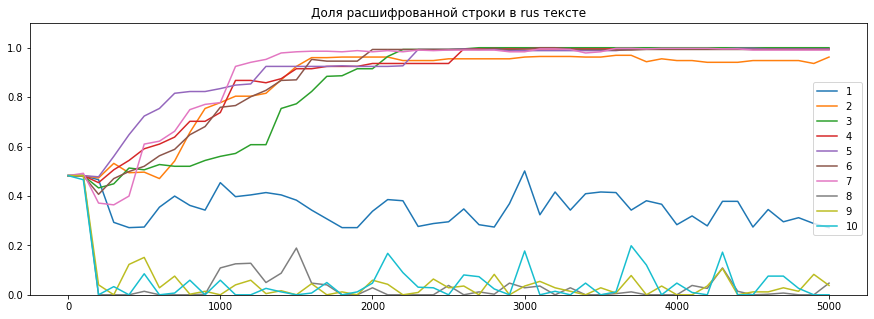

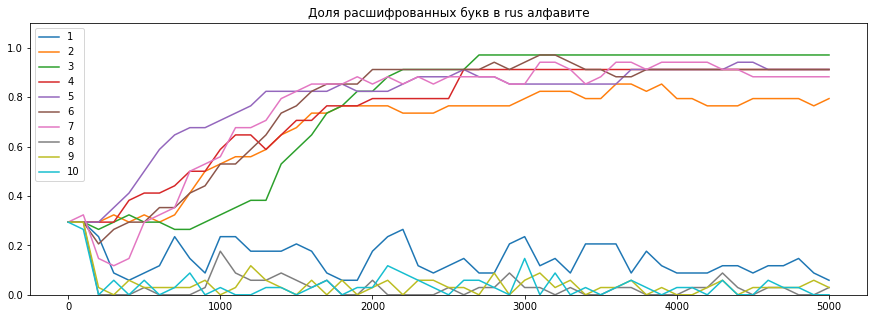

In [46]:
print_quality(full_dec_rus, cipher_rus, s_rus, 'rus')

1-грамма:  0.36127167630057805  |  0.14814814814814814
2-грамма:  1.0  |  0.8888888888888888
3-грамма:  1.0  |  0.8888888888888888
4-грамма:  1.0  |  0.8888888888888888
5-грамма:  1.0  |  0.8888888888888888
6-грамма:  1.0  |  0.8888888888888888
7-грамма:  1.0  |  0.8888888888888888
8-грамма:  0.4624277456647399  |  0.25925925925925924
9-грамма:  0.4190751445086705  |  0.2222222222222222
10-грамма:  0.4190751445086705  |  0.2222222222222222


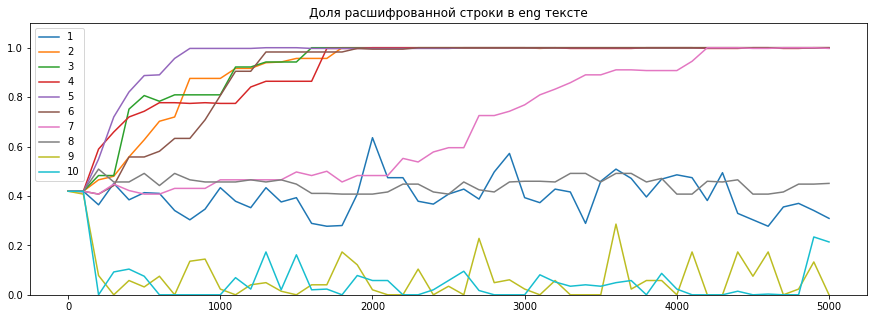

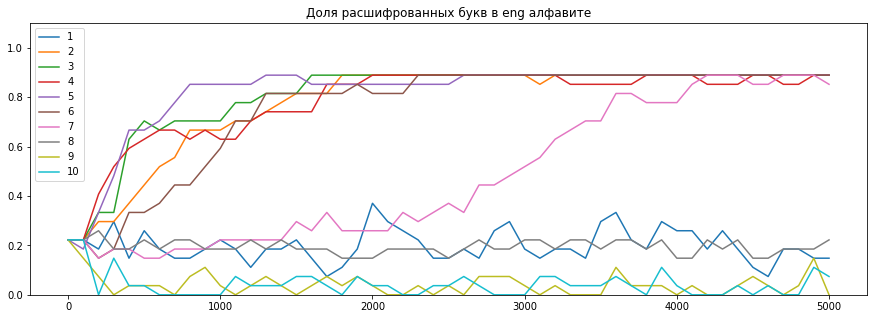

In [50]:
print_quality(full_dec_eng, cipher_eng, s_eng, 'eng')

восстановив текст "глазами" s1 посмотрим на качество метрик для расшифровок при разных n-граммах

In [48]:
s_1_true = 'если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю'
dec_s1_true = {}
for i in range(len(s1)):
    if dec_s1_true.get(s1[i]) == None:
        dec_s1_true[s1[i]] = s_1_true[i]
dec_s1_true = full_decode(dec_s1_true, 'rus')

1-грамма: 
 атсе ву вепена иорылсьиуя есе докне иорылсьиуя намтн з шного тообхаиеж моноруя сагмо дрокенлнь тмораа втаго ву вта тпаслсе дрлвесьио е досзкена ылмтеылсьиуя блсс чл дотсапиаа канварноа члплиеа мзртл эонж моиакио ж иекаго иа обахлй
0.36086956521739133
0.23529411764705882 

2-грамма: 
 овли ть тизино деркалудью или пегни деркалудью носвн ы энебе веехмодия сенерью лобсе прегинану всероо твобе ть тво взолали пратилуде и пелыгино касвикалудью халл ча певлоздоо гонторнео чазадио сырва шеня седогде я дигобе до ехомаж
0.4
0.2647058823529412 

3-грамма: 
 если вы видите норжальный или почти норжальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите жаксижальный балл за последнее четвертое задание курса мотя конечно я ничего не обещаю
0.9782608695652174
0.7941176470588235 

4-грамма: 
 если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимал

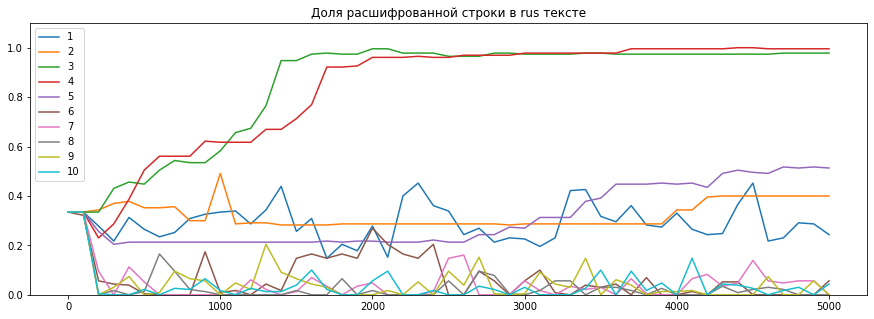

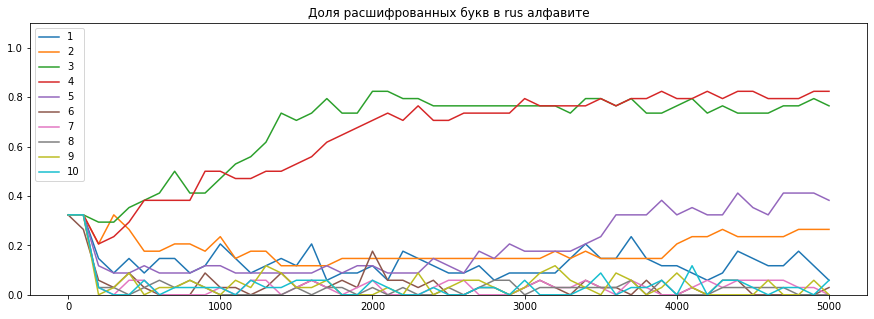

In [54]:
print_quality(full_dec_s1, s1, s_1_true, 'rus', {i:j for j, i in dec_s1_true.items()}, True)

Как видим, на больших текстах хорошо показывают себя 2-7 граммы, как для русского, так и для английского текстов.

При этом для небольших текстов (как из дз), метрики значительно ниже уже начиная с 5-грамм.

При перезапусках, качество сохранялось на этихже n-граммах